<a href="https://colab.research.google.com/github/kodindonesia/Tutorial-Colab-Roses/blob/master/02_Tutorial_Rose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://en.wikipedia.org/wiki/Maurer_rose#Explanation

In [1]:
# download Kodindonesia Colab helpers
!git clone https://github.com/kodindonesia/kicolab.git     &> /dev/null

from kicolab.cvhelper import Canvas_cv, Video_cv           # import helpers in Python

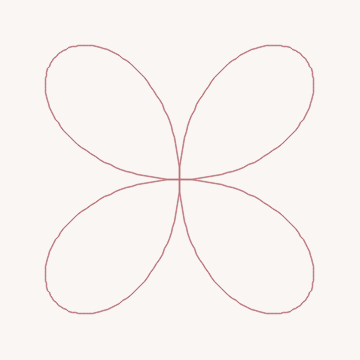

In [3]:
def point_on_rose(canvas, n, angle):
  radius = canvas.math_sine(n * angle) # rose formula   
  return canvas.get_circle_point01(angle, radius)
  
def draw_rose(canvas, n, d=1, color='scarlet sage', thickness=1):
  for angle in range(0, 360):
    point_from = point_on_rose(canvas,n,angle)
    point_to   = point_on_rose(canvas,n,angle+d)
    canvas.draw_line01( point_from, point_to, color, thickness)  

canvas = Canvas_cv(360,360)   # create canvas to draw onto
draw_rose(canvas, 2)          # draw the curve using the function above
canvas.show()                 # show the drawing on the canvas

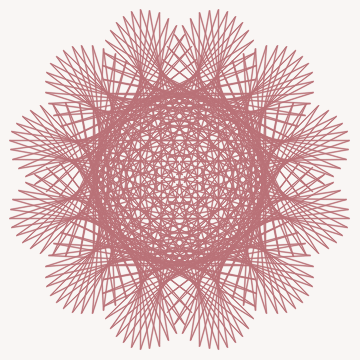

In [4]:
canvas.clear()      # clear the canvas from the previous drawing
draw_rose(canvas, n=118, d=100) 
canvas.show()

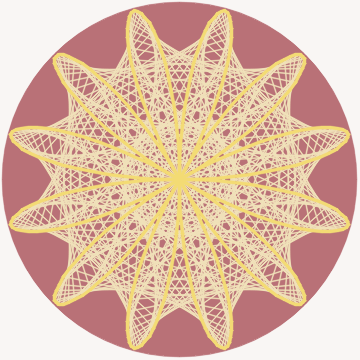

In [5]:
def draw_rose_with_lines(canvas, n, d, curve_thickness=2):
  canvas.clear()
  canvas.draw_circle01(1.015, (0,0), 'scarlet sage', canvas.SOLID)
  draw_rose(canvas, n, d, 'vanilla custard') 
  draw_rose(canvas, n, d=1, color='goldfinch', thickness=2) 

draw_rose_with_lines(canvas, 6, 71)  # like in wikipedia 
canvas.show()

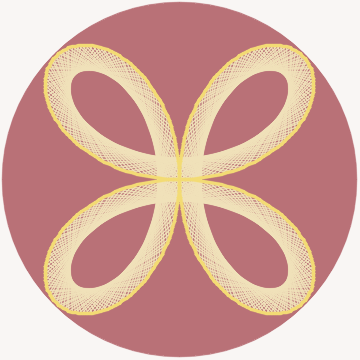

In [6]:
draw_rose_with_lines(canvas, 2, 29)   # like in wikipedia
canvas.show()

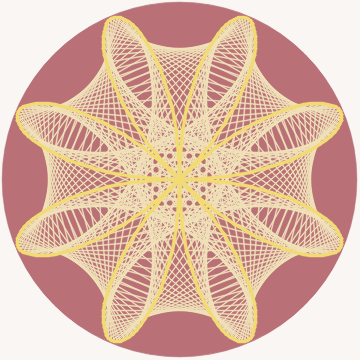

In [7]:
draw_rose_with_lines(canvas, 4, 120)
canvas.show()

In [7]:
# canvas.download()
# canvas.download('rose', is_jpg=True) # smaller file with your favourite name

**VIDEO time !!!**

In [ ]:
d = 71
n_from = 0;  n_to = 6;  video_frames_count=240

canvas = Canvas_cv(width=360, height=360)
vid = Video_cv(fps=14, name="fractions_of_n", frame=canvas)

import numpy as np 
for n in np.linspace(n_from, n_to, video_frames_count): 
  draw_rose_with_lines(canvas, n, d)
  vid.write_frame(canvas)

vid.end_video()

In [ ]:
n_from = 2;   n_to = 12;  n_step = 2
d_from = 29;  d_to = 69;  d_step = 1


vid2 = Video_cv(fps=12, frame=canvas)

for n in range(n_from, n_to, n_step):  
  for d in range(d_from, d_to, d_step):  
    draw_rose_with_lines(canvas, n, d)
    vid2.write_frame()

vid2.end_video()

In [10]:
# vid.download()
# vid2.download()

*Note: the code in wikipedia is incomplete. It only works for d that are not divisible by 2, 3, 5. Our code is better because it works for all d, and it is based on the following paper:*

http://www.austromath.at/dug/dnl07.pdf

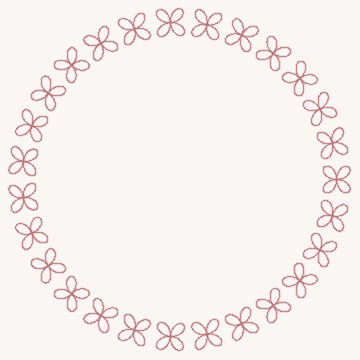

In [12]:
# Rose Version 2.  This only works for an integer number of petals

def point_on_rose(canvas, n, angle, angle2=0, radius2=0):
  centre01 = canvas.get_circle_point01(angle2, radius2)
  a = angle 
  radius = canvas.math_sine(n * angle) * (1-radius2)   
  point_on_rose = canvas.get_circle_point01(a, radius, centre01)
  return canvas.transform_point_around_pivot(point_on_rose, angle2, centre01)
  
def draw_rose(canvas, n_petals, d=1, color='scarlet sage', thickness=1, radius2=0):
  import numpy as np; import math
  circum = radius2 * 2 * math.pi
  max_diameter_rose = (1-radius2)*2
  roses_num =  canvas.int(circum / max_diameter_rose)-1
  def draw(canvas,n,d, angle, angle2, radius2):
    point_from = point_on_rose(canvas,n, angle, angle2, radius2)
    point_to   = point_on_rose(canvas,n,angle+d, angle2, radius2)
    canvas.draw_line01( point_from, point_to, color, thickness) 
  for angle2 in np.linspace(0, 360, roses_num, endpoint=False):
    if (n_petals % 2)==1 :
      for angle in range(0, 360 ):
        draw(canvas,n_petals, d, angle, angle2, radius2)
    elif ((n_petals/2) % 2)==0:   
      for angle in range(0, 360 ): # 4, 8, 12, and other n that are even after dividing by 2 
        draw(canvas,n_petals/2, d, angle, angle2, radius2)
    else: # 2, 6, 10, 14, 18, and other n that are odd after dividing by 2
      for angle in range(0, 180 ):  
        draw(canvas,n_petals,d, angle, angle2, radius2)


canvas = Canvas_cv(360,360)   # create canvas to draw onto
draw_rose(canvas, 4, d=1, radius2=1-1/10)          # draw the curve using the function above
canvas.show()                 # show the drawing on the canvas
